<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Prroject_4_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team Members:

##### Joseph Mart (Project Lead)- A00732897
##### Callitus Obunadike - A00756855

### Problem Statement

In this project, we consider the spam email detection problem. The data set is available from
several places. One convenient way to access it is through R package kernlab. The objective
is to apply the Random Forest predictive model in determining whether an email is a regular
or spam email.

Thus this is a classication problem with binary responses. Please follow the specic steps
listed below to conduct the analysis:

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

### (a)Load the data

In [2]:
df = pd.read_csv('/content/SpamDataset.csv') 

In [3]:
#Check top 5 rows
df.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


###### (b)Take a look at the dimension of the data. Inspect if there are missing values and, if so, impute them.

In [4]:
#dimension of data

df.shape

(4601, 58)

In [5]:
# Checking for missing values

df.isnull().sum()

make                 0
address              0
all                  0
num3d                0
our                  0
over                 0
remove               0
internet             0
order                0
mail                 0
receive              0
will                 0
people               0
report               0
addresses            0
free                 0
business             0
email                0
you                  0
credit               0
your                 0
font                 0
num000               0
money                0
hp                   0
hpl                  0
george               0
num650               0
lab                  0
labs                 0
telnet               0
num857               0
data                 0
num415               0
num85                0
technology           0
num1999              0
parts                0
pm                   0
direct               0
cs                   0
meeting              0
original             0
project    

No missing values

###### (c) Explore data using numerical and graphical EDA techniques. For example, what is the percentage of spam emails?  What are types (categorical or continuous) of the inputs?  Are there any peculiar features for any variable that we should pay attention to? Don't present any R output for this part unless really necessary.  Instead, summarize your findings in concise language.

In [10]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    num_of_values = len(unique_vals)
    if num_of_values < 12:
        print('The number of distinct values for feature  {} is/are:  {} -- {}'.format(column, num_of_values,unique_vals))
    else:
        print('The number of distinct values for feature  {} is/are:  {}'.format(column, num_of_values))

The number of distinct values for feature  make is/are:  142
The number of distinct values for feature  address is/are:  171
The number of distinct values for feature  all is/are:  214
The number of distinct values for feature  num3d is/are:  43
The number of distinct values for feature  our is/are:  255
The number of distinct values for feature  over is/are:  141
The number of distinct values for feature  remove is/are:  173
The number of distinct values for feature  internet is/are:  170
The number of distinct values for feature  order is/are:  144
The number of distinct values for feature  mail is/are:  245
The number of distinct values for feature  receive is/are:  113
The number of distinct values for feature  will is/are:  316
The number of distinct values for feature  people is/are:  158
The number of distinct values for feature  report is/are:  133
The number of distinct values for feature  addresses is/are:  118
The number of distinct values for feature  free is/are:  253
The 

What are types (categorical or continuous) of the inputs?

All features but type are continuos , type is categorical

In [12]:
# Creating Scale Map
scale_mapper = {'nonspam':0, 'spam':1}

# Map feature values to scale
df['type'] = df['type'].replace(scale_mapper)

In [15]:
#Get the Type uniques categories

df['type'].unique()

array([1, 0])

In [16]:
df.head(2)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


###### Are there any peculiar features for any variable that we should pay attention to?

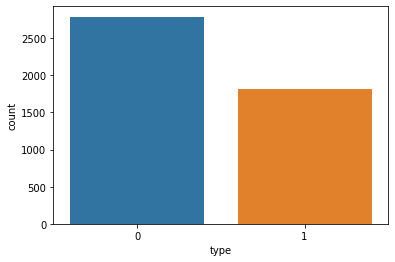

In [17]:
#Response Balancesness :  frequency distribution

sns.countplot(data=df,x='type')

The response is not balanced, although more of the response fall in the nonspam category,  hence we should expect most of our correct predictions to be in nonspam than spam category in evaluation metrics such as confusion matrix

#### Explore the associations between Class and other attributes.

In [19]:
df.columns

Index(['make', 'address', 'all', 'num3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', 'num000',
       'money', 'hp', 'hpl', 'george', 'num650', 'lab', 'labs', 'telnet',
       'num857', 'data', 'num415', 'num85', 'technology', 'num1999', 'parts',
       'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu',
       'table', 'conference', 'charSemicolon', 'charRoundbracket',
       'charSquarebracket', 'charExclamation', 'charDollar', 'charHash',
       'capitalAve', 'capitalLong', 'capitalTotal', 'type'],
      dtype='object')

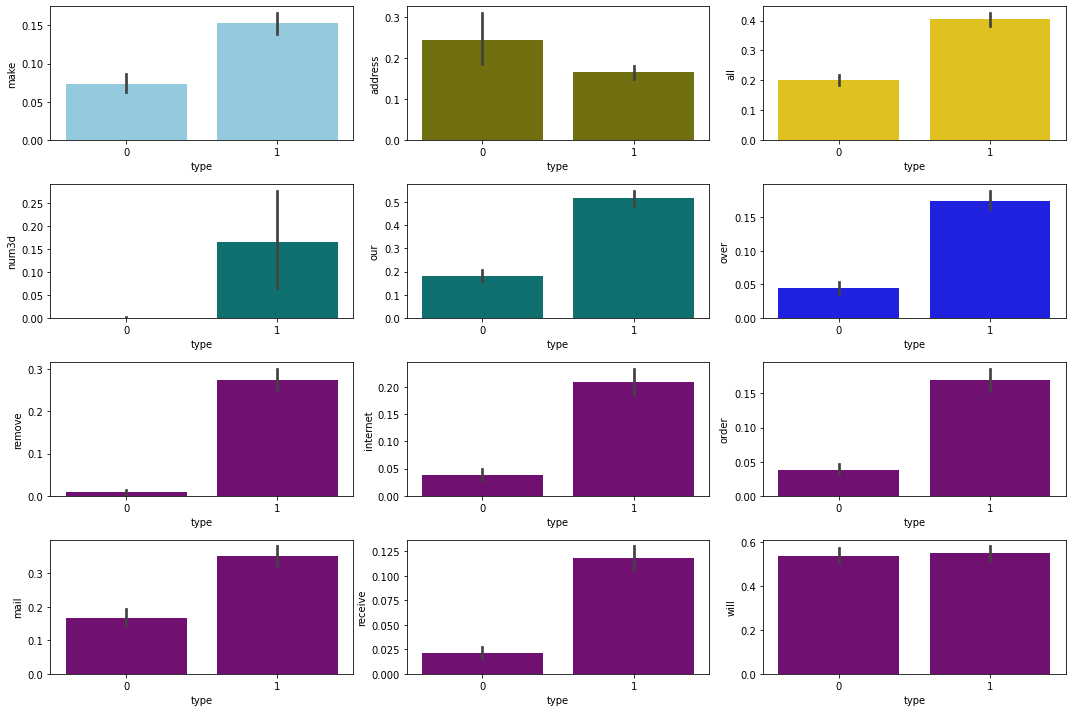

In [20]:
fig,axs = plt.subplots(4,3, figsize = (15,10))

sns.barplot(data=df,x ='type' ,y="make",  color="skyblue", ax=axs[0, 0])
sns.barplot(data=df, x ='type', y="address", color="olive", ax=axs[0, 1])
sns.barplot(data=df, x ='type', y="all", color="gold", ax=axs[0, 2])
sns.barplot(data=df, x ='type', y="num3d",color="teal", ax=axs[1, 0])
sns.barplot(data=df, x ='type', y="our",color="teal", ax=axs[1, 1])
sns.barplot(data=df, x ='type', y="over", color="blue", ax=axs[1, 2])
sns.barplot(data=df, x ='type', y="remove", color="purple", ax=axs[2,0])
sns.barplot(data=df, x ='type', y="internet", color="purple", ax=axs[2,1])
sns.barplot(data=df, x ='type', y="order", color="purple", ax=axs[2,2])
sns.barplot(data=df, x ='type', y="mail", color="purple", ax=axs[3,0])
sns.barplot(data=df, x ='type', y="receive", color="purple", ax=axs[3,1])
sns.barplot(data=df, x ='type', y="will", color="purple", ax=axs[3,2])

fig.tight_layout()

The above plot shows the amount of spam and nonspam emails with respect to each features

##### Investigating Multicolinearity

In [40]:
dfcor = df.drop(columns=['type'])

In [41]:
correlatedColumns = []
corr = dfcor.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.7
negthreshold = -0.7

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity found in dataset')

else: print(correlatedColumns)

[{'column': 'telnet', 'row': 'num857', 'val': 0.7375548552311039}, {'column': 'telnet', 'row': 'num415', 'val': 0.7351868493850148}, {'column': 'num857', 'row': 'telnet', 'val': 0.7375548552311039}, {'column': 'num857', 'row': 'num415', 'val': 0.9960660509313944}, {'column': 'num857', 'row': 'technology', 'val': 0.7297496052731776}, {'column': 'num857', 'row': 'direct', 'val': 0.848020708618814}, {'column': 'num415', 'row': 'telnet', 'val': 0.7351868493850148}, {'column': 'num415', 'row': 'num857', 'val': 0.9960660509313944}, {'column': 'num415', 'row': 'technology', 'val': 0.727118565905213}, {'column': 'num415', 'row': 'direct', 'val': 0.8453591164400025}, {'column': 'technology', 'row': 'num857', 'val': 0.7297496052731776}, {'column': 'technology', 'row': 'num415', 'val': 0.727118565905213}, {'column': 'direct', 'row': 'num857', 'val': 0.848020708618814}, {'column': 'direct', 'row': 'num415', 'val': 0.8453591164400025}]


There pairs in the result above shows Multicolinearity  in the data

##### Are there any peculiar features for any variable that we should pay attention to?

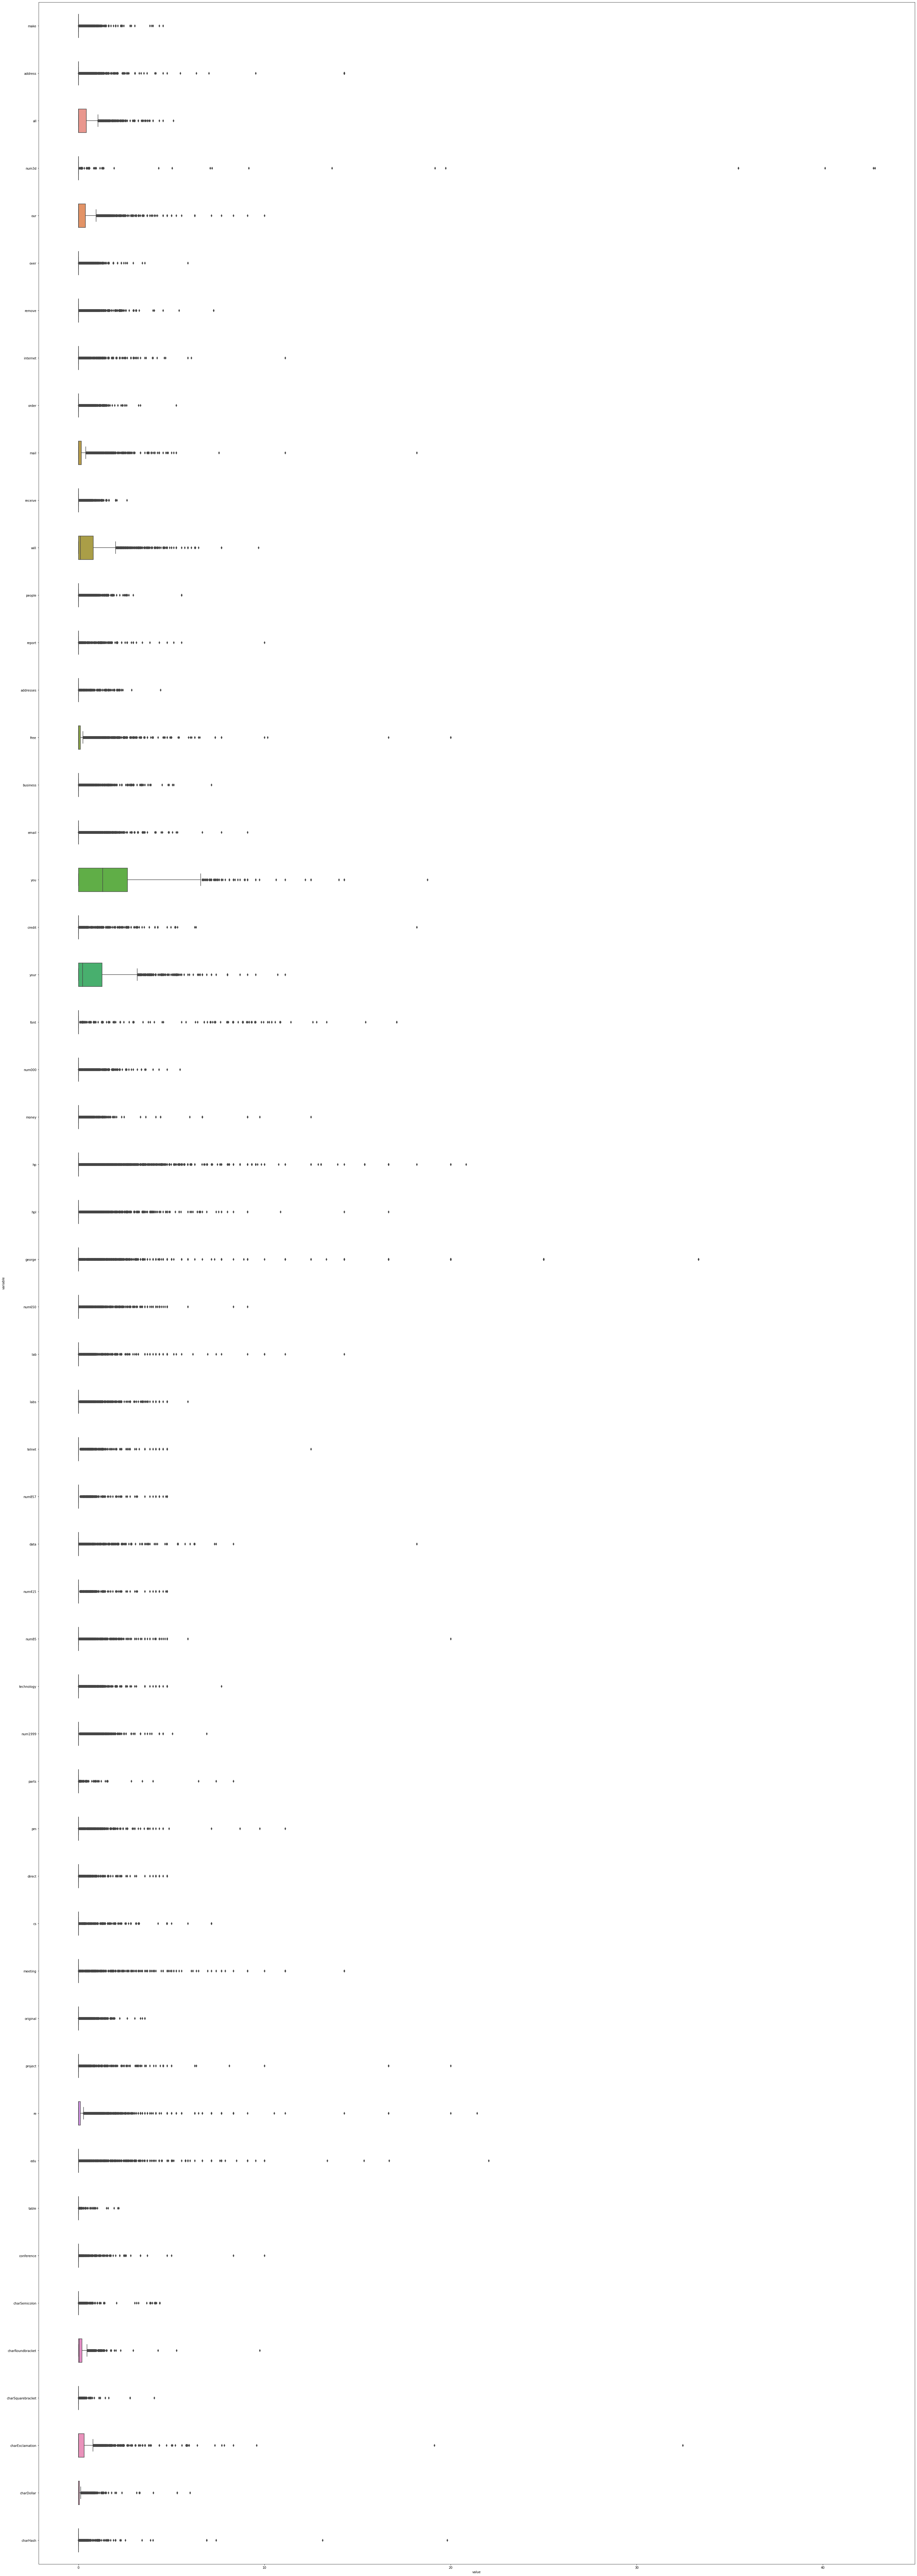

In [36]:
#Checking Predictors for outliers

plt.figure(figsize=(50,150))

df2 = pd.DataFrame(data=df, columns=['make', 'address', 'all', 'num3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', 'num000',
       'money', 'hp', 'hpl', 'george', 'num650', 'lab', 'labs', 'telnet',
       'num857', 'data', 'num415', 'num85', 'technology', 'num1999', 'parts',
       'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu',
       'table', 'conference', 'charSemicolon', 'charRoundbracket',
       'charSquarebracket', 'charExclamation', 'charDollar', 'charHash'
       ])

sns.boxplot(y="variable", x="value", data=pd.melt(df2), width= 0.5)
plt.show()

Several of the features have outliers in them

###### what is the percentage of spam emails?

In [37]:
df['type'].value_counts()

0    2788
1    1813
Name: type, dtype: int64

About 39% of the emails are spam emails

(d) Randomly divide your data sets into the training sample and test sample with a ratio of 2:1.

In [42]:
# Scaling no categorical columns

scale_vars = ['make', 'address', 'all', 'num3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', 'num000',
       'money', 'hp', 'hpl', 'george', 'num650', 'lab', 'labs', 'telnet',
       'num857', 'data', 'num415', 'num85', 'technology', 'num1999', 'parts',
       'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu',
       'table', 'conference', 'charSemicolon', 'charRoundbracket',
       'charSquarebracket', 'charExclamation', 'charDollar', 'charHash',
       'capitalAve', 'capitalLong', 'capitalTotal']

scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars]) #df[scale_vars] -> making the np.aaary new_raw_data a dataframe


In [43]:
df.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1


In [61]:
X = df.drop('type', axis = 1)
X

,make,address,all,num3d,our,over,remove,internet,order,mail,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.0,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.0,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861


In [45]:
y = df['type']
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: type, Length: 4601, dtype: int64

In [46]:
#Split the data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size = 30, random_state=15)

### 2. Supervised Learning:
    
###### (a) Try out the Random Forest (RF) model using the dataset. Use the training set to identify the best model and apply the model to the test set. Since the method involves numerous parameters to choose or tune, make sure that important details in the model fitting are clearly explained in your report.

In [47]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)

In [48]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test), end='\n\n\n')

Training Accuracy is:  0.9996894409937889
Testing Accuracy is:  0.9




In [49]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Figure size 432x288 with 0 Axes>

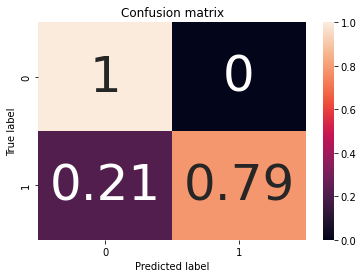

<Figure size 432x288 with 0 Axes>

In [50]:
# Confusion Matrix output
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_norm, classes=rf.classes_)
plt.figure()

In [58]:
confusion_matrix(y_test, prediction_test)

array([[16,  0],
       [ 3, 11]])

##### ROC Curve

In [51]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

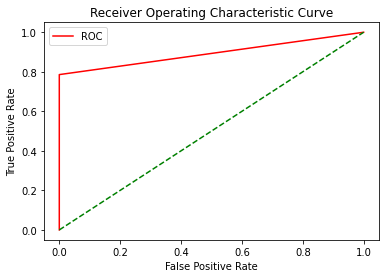

In [52]:

from sklearn.metrics import roc_curve

fper, tper, thresholds = roc_curve(y_test, prediction_test)
plot_roc_curve(fper, tper)

### 3. Additional Features from RF:

###### (a) Train the RF model with B = 2,000 trees using the entire data set. Make sure that you set these two options: importance = TRUE and proximity = TRUE.

In [53]:
#Build the model with B=2000
clf = RandomForestClassifier(n_estimators=2000,max_depth=45,max_features="auto", min_samples_leaf=4,
                       min_samples_split=15,bootstrap=False
                    )

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=45, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=2000)

In [64]:
y_pred = clf.predict(X_test)

In [65]:
print (f'Train Accuracy - : {clf.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {clf.score(X_test,y_test):.3f}')

Train Accuracy - : 0.983
Test Accuracy - : 0.867


In [66]:
confusion_matrix(y_test, y_pred)

array([[16,  0],
       [ 4, 10]])

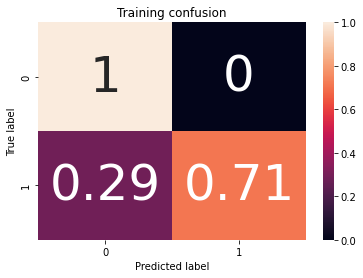

In [67]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]   # normalize the cm


plt.figure()
plot_confusion_matrix(cm = cm_norm, classes=clf.classes_, title='Training confusion')

A better way to approach this is to do Hyperparameter Tuning and build a final best RF model for the best parameters rather chossing a random n_estimators value

###### i. Obtain the variable importance ranking plots.

We will use Random Forest feature importnace inbuilt method to get Feature Importnace

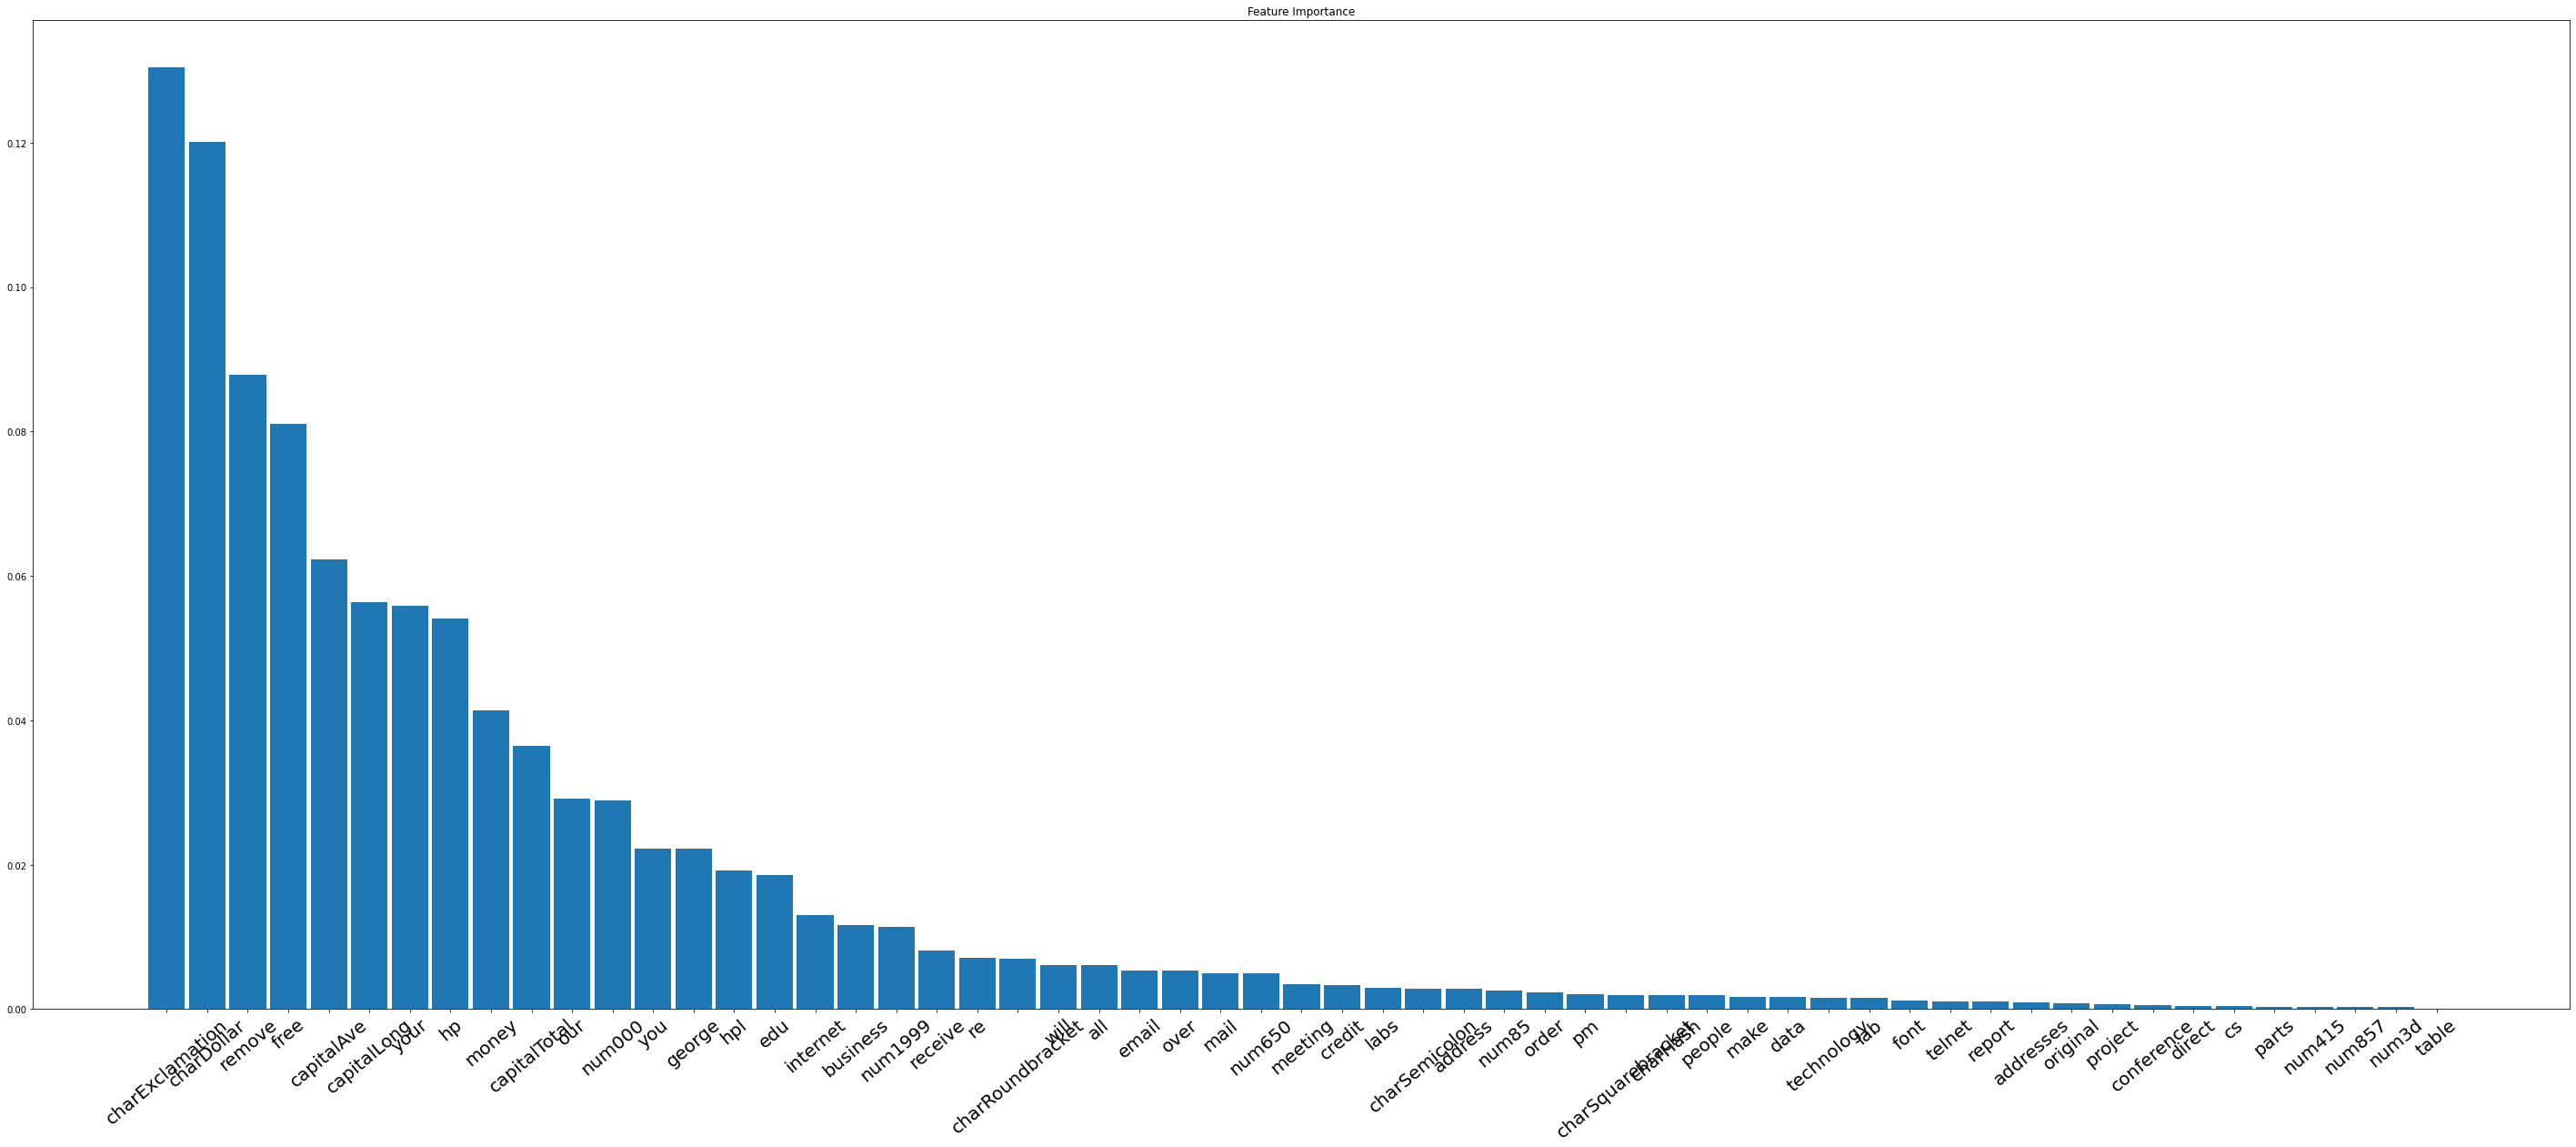

In [116]:

plt.figure(figsize=(50,20))

# Calculate feature importances
importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices],width=0.9)
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=40, fontsize = 20)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [114]:
importances

array([1.68798673e-03, 2.77505199e-03, 6.09112298e-03, 2.50633699e-04,
       2.91308238e-02, 5.32797937e-03, 8.78460288e-02, 1.30088544e-02,
       2.28926295e-03, 4.97816305e-03, 8.18256162e-03, 6.11402783e-03,
       1.90984643e-03, 1.03073750e-03, 9.06113605e-04, 8.10334178e-02,
       1.15984108e-02, 5.36458990e-03, 2.22149793e-02, 3.29544964e-03,
       5.58767658e-02, 1.23247777e-03, 2.89313899e-02, 4.13146766e-02,
       5.40674469e-02, 1.92187596e-02, 2.21951402e-02, 4.93644533e-03,
       1.50816220e-03, 2.95605840e-03, 1.06116840e-03, 2.86522388e-04,
       1.64152314e-03, 3.30846001e-04, 2.62654757e-03, 1.50855782e-03,
       1.13480137e-02, 3.37802417e-04, 2.01780122e-03, 4.86789342e-04,
       3.80043003e-04, 3.51986600e-03, 8.47314523e-04, 6.69669090e-04,
       7.14581101e-03, 1.86306670e-02, 4.95563316e-06, 5.13549155e-04,
       2.82619073e-03, 6.98892779e-03, 1.98422075e-03, 1.30418164e-01,
       1.20111075e-01, 1.93711408e-03, 6.22245781e-02, 5.63865800e-02,
      

In [129]:
#Descending order

sorted(importances, reverse=True)

[0.13041816357566086,
 0.12011107496805637,
 0.08784602883063729,
 0.08103341777412772,
 0.06222457807417848,
 0.05638658001138526,
 0.05587676580382161,
 0.05406744694414046,
 0.04131467660886356,
 0.036492337621692524,
 0.02913082384477003,
 0.02893138986872251,
 0.022214979333616477,
 0.022195140237000158,
 0.019218759621107306,
 0.018630667004472037,
 0.013008854368204708,
 0.011598410752932246,
 0.01134801371036794,
 0.008182561619650235,
 0.007145811005122761,
 0.006988927792543596,
 0.006114027830874942,
 0.006091122978777348,
 0.00536458990221281,
 0.005327979366128076,
 0.004978163047663118,
 0.0049364453308604,
 0.0035198660006231478,
 0.0032954496371365412,
 0.0029560583971394673,
 0.0028261907271501783,
 0.002775051987437196,
 0.0026265475667504304,
 0.002289262952007494,
 0.002017801224040064,
 0.0019842207533695686,
 0.0019371140817784818,
 0.0019098464344797668,
 0.0016879867298678767,
 0.0016415231423855083,
 0.0015085578194019877,
 0.0015081622004388697,
 0.00123247776

#### ii. Obtain the partial dependence plot for the top two variables that you deem most important. Interpret your analysis.

variables ; charExclamation and charDollar are the top variables on the basis of variable importance. Let us see how they relate to the dependent variable.

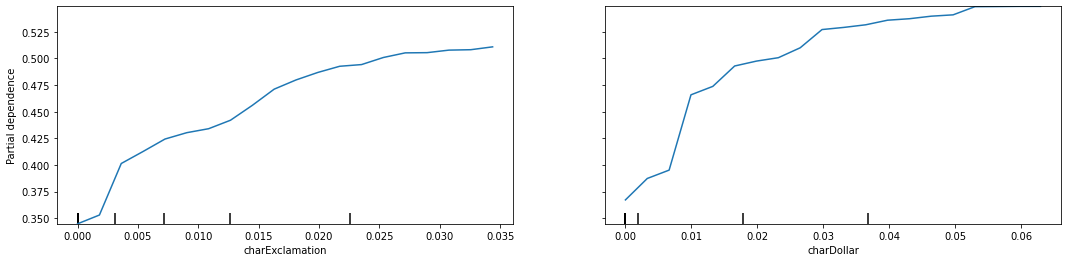

In [120]:
#partial dependence plot for the top two variables
from sklearn.inspection import plot_partial_dependence, partial_dependence

fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(clf, X, ['charExclamation','charDollar'], grid_resolution=20, ax=ax);

For both charExclamation and charDollar, event rate is higher for higher values of the variable. 

#### iii. Obtain the proximity matrix and transform it into a distance or dissimilarity matrix.

In [123]:
def proximityMatrix(model, X, normalize=True):      

    terminals = clf.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat

In [124]:
#Print Proximity Matrix

proximityMatrix(clf, X_train, normalize=True)

array([[1.    , 0.    , 0.005 , ..., 0.    , 0.    , 0.0015],
       [0.    , 1.    , 0.    , ..., 0.    , 0.0105, 0.    ],
       [0.005 , 0.    , 1.    , ..., 0.0445, 0.    , 0.1395],
       ...,
       [0.    , 0.    , 0.0445, ..., 1.    , 0.    , 0.1545],
       [0.    , 0.0105, 0.    , ..., 0.    , 1.    , 0.    ],
       [0.0015, 0.    , 0.1395, ..., 0.1545, 0.    , 1.    ]])

In [128]:
#dissimilarity matrix
from scipy.spatial import distance_matrix

distance_matrix([[0,0],[0,1]], [[1,0],[1,1]])

array([[1.        , 1.41421356],
       [1.41421356, 1.        ]])